In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA - Eksploracyjna Analiza Danych

In [3]:
data = pd.read_csv('data/train.csv')

In [4]:
data.shape

(74111, 29)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

Kolumna `cleaning_fee` typu Boolean zostanie zencodowana przy użyciu OrdinalEncoder'a (0 - False, 1 - True).

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.000000,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
log_price,74111.0,4.782069e+00,7.173938e-01,0.000000,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00
accommodates,74111.0,3.155146e+00,2.153589e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73911.0,1.235263e+00,5.820441e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
latitude,74111.0,3.844596e+01,3.080167e+00,33.338905,3.412791e+01,4.066214e+01,4.074610e+01,4.239044e+01
longitude,74111.0,-9.239753e+01,2.170532e+01,-122.511500,-1.183424e+02,-7.699696e+01,-7.395466e+01,-7.098505e+01
number_of_reviews,74111.0,2.090057e+01,3.782864e+01,0.000000,1.000000e+00,6.000000e+00,2.300000e+01,6.050000e+02
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.000000,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74020.0,1.265793e+00,8.521435e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01


Wartość minimalna w zmiennej celu (`log_price`) jest równa zero. Wyrzucimy rekordy z tą wartością.

## Opis kolumn

Zbiór danych pochodzi z jednej z wiodących stron internetowych dotyczących wynajmu mieszkań.
Dane zawierają 29 kolumn z czego jedną zmienną predykcyjną (log_price).  

Opis kolumn:
- id - identyfikator
- log_price - zlogarytmowana cena mieszkania (zmienna targetu)
- property_type - typ nieruchomości
- room_type - rodzaj pokoju
- amenities - dostępne udogodnienia
- accomodates - liczba osób
- bathrooms - liczba łazienek 
- bed_type - rodzaj łóżek
- cancellaion_policy - polityka dotycząca anulowanych zamówień
- cleaning_fee - opłata za sprzątanie
- city - miasto
- description - opis mieszkania
- first_review - data pierwszej recenzji
- host_has_profile_picture - czy właściciel mieszkania ma zdjęcie profilowe
- host_identity_verification - czy host jest zweryfikowany
- host_response_rate - jak często host odpowiada na zapytania
- host_since - od kiedy właściciel udostępnia mieszkanie
- instant_bookable - czy mieszkanie jest dostępne do zarezerwowania od razu
- last_review - data ostatniej recenzji
- latitiude - szerokość geograficzna budynku
- longitude - długość geograficzna budynku
- name - nazwa oferty mieszkania
- neighbourhood - dzielnica/osiedle, na którym znajduje się mieszkanie
- number_of_reviews - liczba recenzji
- review_scores_rate - ocena użytkowników
- thumbnail_url - link do miniaturki hosta
- zipcode - kod pocztowy
- bedrooms - liczba sypialni
- beds - liczba łóżek

Kolumna `id` jest do usunięcia, ponieważ nie wnosi żadnych informacji do modelu.

`log_price` --> kolumna celu

In [11]:
categorical = list(data.select_dtypes('object').columns)

In [14]:
for col in categorical:
    print('##################################')
    print("Kolumna: " + col)
    print()
    print(data[col].value_counts())
    print('##################################')
    print()

##################################
Kolumna: property_type

Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse       

Hello, I've been running guest house for Koreans visiting U.S. for 3years, and recently decided to run this place for other travelers also. There are 10 room in the house. They are mostly dormitory rooms and couple of couple room and family room. This places are our women's dormitory in third floor. There are three rooms, but no doors. It is basically open space. There are 2 beds in two rooms and 4 in one room. I do not have closet in this room but there are hangers and mini shelves. My travelers usually put their baggage on the floor. There is one full bathroom only for women in 2nd floor, which you will be sharing with other women guests. Right next that bathroom, there is unisex half bathroom. All bathrooms have hair dryers. You cannot use kitchen, but you can use refrigerator.  I offer breakfast every morning from 7-10 am. Bread, cereal, fruits, coffee, milk and juice will be served. You can eat take-out food in the kitchen, but please wash dishes that you used and put trash in the

2015-03-30    246
2014-02-14    173
2015-05-18     83
2016-09-16     83
2015-07-06     82
             ... 
2009-04-08      1
2009-11-22      1
2010-02-28      1
2009-05-11      1
2009-08-23      1
Name: host_since, Length: 3087, dtype: int64
##################################

##################################
Kolumna: instant_bookable

f    54660
t    19451
Name: instant_bookable, dtype: int64
##################################

##################################
Kolumna: last_review

2017-04-30    1344
2017-09-24    1278
2017-09-17    1215
2017-04-23    1025
2017-09-18     832
              ... 
2013-12-11       1
2014-06-19       1
2013-10-26       1
2011-03-28       1
2013-12-28       1
Name: last_review, Length: 1371, dtype: int64
##################################

##################################
Kolumna: name

Bunk bed in the Treat Street Clubhouse           8
Your home away from home                         7
East Village Studio                              7
Cozy Private 

Kolumna `property_type` zostanie zencodowana przy użyciu OneHotEncoder'a.

Kolumna `room_type` zostanie zencodowana przy użyciu OneHotEncoder'a.

Na Kolumnie `amenities` dokanany zostanie rozkład na wartości atomowe i zostanie zencodowana przy użyciu OneHotEncodera
np. {'Pets allowed', 'Wifi'} na dwie kolumny Pets allowed i Wifi. 

`bed_type` --> OneHotEncoder

`cancellation_policy` --> OrdinalEncoder (ponieważ mamy zachowany tutaj porządek)

`city` --> OneHotEncoder

`description`, `name` --> kolumna do wyrzucenia

`first_review`, `last_review`, `host_since` --> kolumny rozbite na rok i miesiąc i zamienione na kolumny numeryczne 

`host_has_profile_pic`, `host_identity_verified`, `instant_bookable` --> OrdinalEncoder (0 - False, 1 - True)

`host_response_rate` -> usunięcie % i zamiana na kolumnę numeryczną

`neighbourhood` --> OneHotEncoder

`thumbnail_url` --> do usunięcia

`zip_code` --> do usunięcia, ponieważ mamy `longitude` oraz `latitude`

### Kolumny numeryczne

In [22]:
numeric = list(data.select_dtypes('number').columns)

In [23]:
numeric

['id',
 'log_price',
 'accommodates',
 'bathrooms',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

`id` --> do wyrzucenia

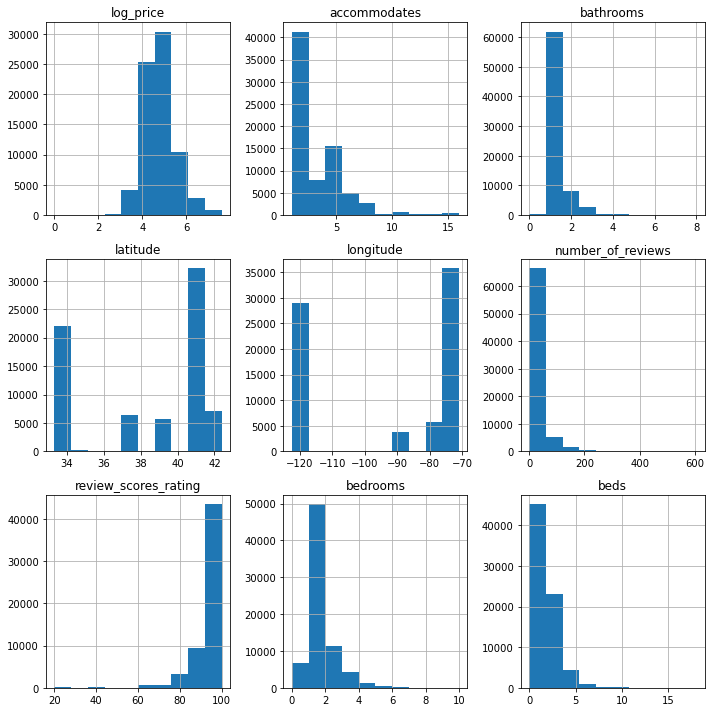

In [27]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
row = col = 0
for n,i in enumerate(numeric[1:]):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    data[i].hist(ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1
    
fig.tight_layout()

plt.show()

W kolumnach numerycznych, które zostały sprawdzimy skośność i zastosujemy przekształcenie logarytmiczne w celu redukcji skośności.

# Braki danych

In [28]:
data.isnull().sum()[data.isnull().sum() > 0]

bathrooms                   200
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
last_review               15827
neighbourhood              6872
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

Braki w kolumnach: 
- `bathrooms`, `beds`, `bedrooms`, `host_response_rate` zastąpimy za pomocą KNNImputer'a
- `first_review`, `host_since`, `last_review` - zastąpimy dominantami
- `review_scores_rating` - zastąpimy za pomocą IterativeImputer'a

In [34]:
data['first_review'] = pd.to_datetime(data['first_review'], format='%Y-%m-%d')
data['last_review'] = pd.to_datetime(data['last_review'], format='%Y-%m-%d')
data['host_since'] = pd.to_datetime(data['host_since'], format='%Y-%m-%d')


print(data['first_review'].groupby([data["first_review"].dt.year, data["first_review"].dt.month]).count().sort_values(ascending = False).head(1))
print()
print(data['last_review'].groupby([data["last_review"].dt.year, data["last_review"].dt.month]).count().sort_values(ascending = False).head(1))
print()
print(data['host_since'].groupby([data["host_since"].dt.year, data["host_since"].dt.month]).count().sort_values(ascending = False).head(1))

first_review  first_review
2016.0        7.0             2275
Name: first_review, dtype: int64

last_review  last_review
2017.0       9.0            15562
Name: last_review, dtype: int64

host_since  host_since
2015.0      7.0           1528
Name: host_since, dtype: int64


Dominanty:
- `first_review` - 2016.07
- `last_review` - 2017.09
- `host_since` - 2015.07

## Preprocessing wykonywany jest w drugim notebooku wraz z tworzeniem i wyborem modelów.